In [1]:
import fxcmpy
import pandas as pd
import plotly.express as px
import datetime as dt
import numpy as np
import backtrader

In [2]:
con = fxcmpy.fxcmpy(config_file='fxcm.cfg', server='demo') # server = 'real' for live

In [3]:
instruments = con.get_instruments()
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'USEquities']


## Getting historical data

In [14]:
start_dt = dt.datetime(2018, 1, 1)
stop_dt = dt.datetime(2020, 1, 29)

data = con.get_candles('EUR/GBP', period='H1', start = start_dt, stop = stop_dt)  # daily data
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2018-01-02 22:00:00,0.88910,0.88703,0.89173,0.88580,0.88935,0.88742,0.89193,0.88599,137937
2018-01-03 22:00:00,0.88703,0.88867,0.88991,0.88471,0.88742,0.88923,0.89012,0.88492,147134
2018-01-04 22:00:00,0.88867,0.89030,0.89234,0.88798,0.88923,0.89087,0.89255,0.88814,140781
2018-01-05 22:00:00,0.89030,0.88619,0.89102,0.88619,0.89087,0.88764,0.89140,0.88677,145484
2018-01-07 22:00:00,0.88619,0.88652,0.88737,0.88613,0.88764,0.88756,0.88850,0.88675,343
...,...,...,...,...,...,...,...,...,...
2020-01-25 03:00:00,0.84117,0.84306,0.84433,0.83850,0.84237,0.84373,0.84453,0.83906,183648
2020-01-26 22:00:00,0.84274,0.84311,0.84349,0.84223,0.84411,0.84393,0.84486,0.84313,237
2020-01-27 22:00:00,0.84311,0.84366,0.84483,0.84076,0.84393,0.84395,0.84504,0.84096,141602


In [15]:
data['pandas_SMA_3'] = data["askclose"].rolling(window=3).mean()
data['pandas_SMA_50'] = data["askclose"].rolling(window=50).mean()

data.head()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,pandas_SMA_3,pandas_SMA_50
date,,,,,,,,,,,
2018-01-02 22:00:00,0.88910,0.88703,0.89173,0.88580,0.88935,0.88742,0.89193,0.88599,137937,NaN,NaN
2018-01-03 22:00:00,0.88703,0.88867,0.88991,0.88471,0.88742,0.88923,0.89012,0.88492,147134,NaN,NaN
2018-01-04 22:00:00,0.88867,0.89030,0.89234,0.88798,0.88923,0.89087,0.89255,0.88814,140781,0.889173,NaN
2018-01-05 22:00:00,0.89030,0.88619,0.89102,0.88619,0.89087,0.88764,0.89140,0.88677,145484,0.889247,NaN
2018-01-07 22:00:00,0.88619,0.88652,0.88737,0.88613,0.88764,0.88756,0.88850,0.88675,343,0.888690,NaN


<function matplotlib.pyplot.show(*args, **kw)>

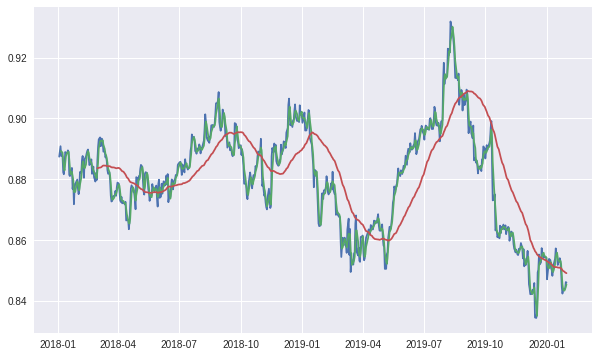

In [16]:
from pylab import plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use('seaborn')
plt.figure(figsize = (10,6))
plt.plot(data['askclose'])
plt.plot(data['pandas_SMA_3'])
plt.plot(data['pandas_SMA_50'])
plt.show

## Subscribe to live data

In [17]:
con.subscribe_market_data('EUR/CHF')

In [18]:
con.get_subscribed_symbols()

['EUR/CHF']

In [19]:
con.is_subscribed('EUR/CHF')

True

In [20]:
con.get_last_price('EUR/CHF')

Bid     1.06903
Ask     1.06922
High    1.07254
Low     1.06804
Name: 2020-01-30 16:29:41.475000, dtype: float64

In [22]:
con.unsubscribe_market_data('EUR/CHF')
print("unsubscribed")

unsubscribed


In [1]:
print("ur mom gay")

ur mom gay
